In [1]:
from importlib import reload
import src.UNET
import src.preprocessing
reload(src.UNET)
reload(src.preprocessing)

import numpy as np
from src.UNET import UNET
from src.preprocessing import data_generator
from keras.models import load_model, Model

import matplotlib.pyplot as plt


Using TensorFlow backend.


In [2]:
# Load images
PATCH_SIZE = 128

x_train, x_test, y_train, y_test = data_generator(PATCH_SIZE, num_images = 15, rotation_degs=[])


In [3]:
# Build model equal to the tested model

unet = UNET(args = '', image_shape = (PATCH_SIZE, PATCH_SIZE, 3), layers = 3)
unet.build_model()
model = unet.get_model()


Building model with 3 layers
Filtersizes being used in UNET: [16, 32, 64, 128]
Bulding contraction layers at layer: 1 and filtersize: 16
Bulding contraction layers at layer: 2 and filtersize: 32
Bulding contraction layers at layer: 3 and filtersize: 64
Building bottleneck at layer: 3 and filtersize: 128
Building expansion at layer: 3 and filtersize: 64
Building expansion at layer: 2 and filtersize: 32
Building expansion at layer: 1 and filtersize: 16
Compiling model...
Model compiled.


In [4]:
unet.describe_model()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 128, 128, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 128, 128, 16) 448         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 128, 128, 16) 2320        conv2d_1[0][0]                   
__________________________________________________________________________________________________
dropout_1 (Dropout)             (None, 128, 128, 16) 0           conv2d_2[0][0]                   
____________________________________________________________________________________________

In [5]:
model.load_weights('./models/F1_0.8458_LAY3.h5')

In [198]:
model.evaluate(x_test, y_test)

3/3 [==============================] - 2s 732ms/step


[0.16476128995418549,
 0.7809593677520752,
 0.710773766040802,
 0.8665247559547424,
 0.76983642578125]

In [7]:
# Run predictions
n = 1
pred = model.predict(x_train[n:n+1, :, :, :])
pred[pred > 0.5] = 1
pred[pred <= 0.5] = 0

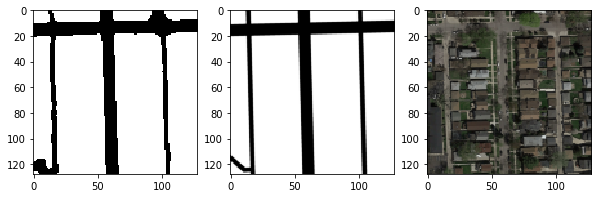

In [8]:

f = plt.figure(figsize = (10, 15))
plt.subplot(1,3,1)
plt.imshow(pred.reshape(PATCH_SIZE, PATCH_SIZE), cmap = 'Greys')
plt.subplot(1,3,2)
plt.imshow(y_train[n].reshape(PATCH_SIZE, PATCH_SIZE), cmap = 'Greys')
plt.subplot(1,3,3)
plt.imshow(x_train[n].reshape(PATCH_SIZE, PATCH_SIZE, 3))

In [339]:
NEW_SIZE = 608
p = np.asarray([resize(pred[i], (608, 608, 1)) for i in range(len(pred))])
p[0].shape

(608, 608, 1)

In [380]:
import cv2
fs = 15
kernel = np.ones((fs, fs), np.float32)/(fs*fs)
blur = cv2.bilateralFilter(p[0], 9, 75, 75)
tol = 0.1

blur[blur > tol] = 1
blur[blur <= tol] = 0


error: OpenCV(3.4.7) ../modules/imgproc/src/bilateral_filter.dispatch.cpp:424: error: (-210:Unsupported format or combination of formats) Bilateral filtering is only implemented for 8u and 32f images in function 'bilateralFilter'


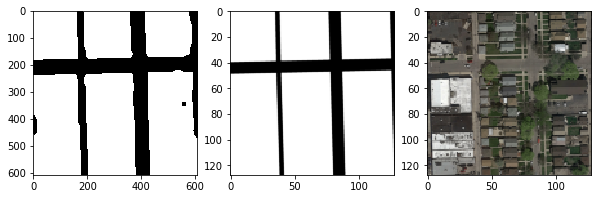

In [370]:
f = plt.figure(figsize = (10, 15))
plt.subplot(1,3,1)
plt.imshow(blur.reshape(NEW_SIZE, NEW_SIZE), cmap = 'Greys')
plt.subplot(1,3,2)
plt.imshow(y_train[n].reshape(PATCH_SIZE, PATCH_SIZE), cmap = 'Greys')
plt.subplot(1,3,3)
plt.imshow(x_train[n].reshape(PATCH_SIZE, PATCH_SIZE, 3))

In [9]:
from src.create_submission import create_submission

create_submission('dummy_submission.csv', model)


Succesfully created submission.


In [10]:
import src.submission_to_mask 